In [ ]:
# 1. Importar as bibliotecas necessárias
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
print("Carregando o dataset de satélite... Isso pode levar um momento.")
sat_data = fetch_openml(name='satimage', version=1, as_frame=False, parser='liac-arff')

X = sat_data.data

y = sat_data.target.astype(np.float32).astype(np.int8)

print("\nDados carregados com sucesso!")
print(f"Formato das características (X): {X.shape}")
print(f"Formato dos rótulos (y): {y.shape}")
print(f"Classes presentes no dataset: {np.unique(y)}")

Carregando o dataset de satélite... Isso pode levar um momento.

Dados carregados com sucesso!
Formato das características (X): (6430, 36)
Formato dos rótulos (y): (6430,)
Classes presentes no dataset: [1 2 3 4 5 7]


In [6]:
# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDados divididos em conjuntos de treino e teste.")
print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")


Dados divididos em conjuntos de treino e teste.
Tamanho do treino: 4501 amostras
Tamanho do teste: 1929 amostras


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("\nDados padronizados (scaling) com sucesso.")


Dados padronizados (scaling) com sucesso.


In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

print("\nModelo KNN criado e treinado com sucesso!")


Modelo KNN criado e treinado com sucesso!


In [9]:
# 6. Fazer previsões e Avaliar
y_pred = knn.predict(X_test_scaled)

print("\nPrevisões feitas no conjunto de teste.")

# Avaliar a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f"\nA acurácia do modelo é: {acuracia * 100:.2f}%")

# Um relatório mais detalhado
print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred))


Previsões feitas no conjunto de teste.

A acurácia do modelo é: 91.14%

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       447
           2       0.99      0.97      0.98       238
           3       0.91      0.93      0.92       403
           4       0.71      0.68      0.69       186
           5       0.92      0.88      0.90       215
           7       0.90      0.90      0.90       440

    accuracy                           0.91      1929
   macro avg       0.90      0.89      0.89      1929
weighted avg       0.91      0.91      0.91      1929



Gerando a Matriz de Confusão...
Imagem da Matriz de Confusão salva em: main_files/matriz_confusao_knn.png


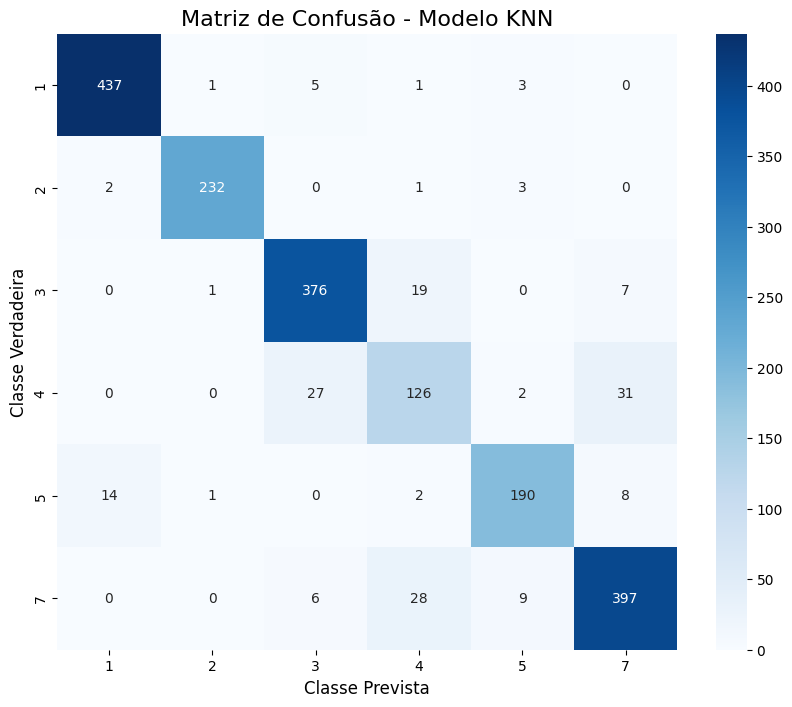

In [10]:
# --- Célula para gerar e salvar a Matriz de Confusão ---

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

print("Gerando a Matriz de Confusão...")

cm = confusion_matrix(y_test, y_pred)

class_names = ['1', '2', '3', '4', '5', '7']

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.title('Matriz de Confusão - Modelo KNN', fontsize=16)
plt.ylabel('Classe Verdadeira', fontsize=12)
plt.xlabel('Classe Prevista', fontsize=12)

if not os.path.exists('main_files'):
    os.makedirs('main_files')

caminho_imagem = 'main_files/matriz_confusao_knn.png'
plt.savefig(caminho_imagem)

print(f"Imagem da Matriz de Confusão salva em: {caminho_imagem}")

plt.show()